In [1]:
import sys
sys.path.append('..')
sys.path.append('../stylegan3')

import torch
from latents_dataset import LatentsDataset

from torch import nn
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

from models.SimpleAutoencoder import SimpleAutoencoder
from pytorch_nn import NNUtil

import numpy as np
formatter={'float_kind':"{:.6f}".format}
np.set_printoptions(formatter=formatter)

torch.set_printoptions(precision=3, sci_mode=False)

In [2]:
data_path = '/home/robert/data/diploma-thesis/datasets/stylegan3/tpsi_1/latents/sample_z.h5'
targets_path = '/home/robert/data/diploma-thesis/predictions/stylegan3/tpsi_1/resnet34_eyeglasses.pkl'
batch_size = 8

In [3]:
transform = transforms.Compose([])
ld = LatentsDataset(data_path, targets_path)
# dataset = ld.load_autoencoder_dataset(transform=transform, minmax_norm = False, include_targets = True)
dataset = ld.load_custom_dataset(transform=transform, minmax_norm = False)
train_data, valid_data, test_data = random_split(dataset, [0.8, 0.1, 0.1], generator=torch.Generator().manual_seed(42))
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

for X, y in test_dataloader:
    print(f'Shape of X [N, C, H, W]: {X.shape}',  X)
    print(f'Shape of y: {y.shape} {y.dtype}', y)
    break

Shape of X [N, C, H, W]: torch.Size([8, 512]) tensor([[ 1.938,  1.041, -1.661,  ..., -0.426,  0.715, -1.147],
        [-1.325, -0.604, -0.673,  ..., -0.394,  0.491,  0.489],
        [ 0.889,  1.482, -1.813,  ...,  0.103, -0.796, -1.123],
        ...,
        [-0.086, -0.725,  0.748,  ...,  0.286, -0.668, -0.965],
        [ 0.397,  1.591,  0.488,  ..., -0.048, -0.575, -1.084],
        [ 0.512, -1.801, -1.197,  ...,  0.176,  0.035, -0.299]])
Shape of y: torch.Size([8, 1]) torch.float32 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [4]:
input_shape = (batch_size, len(dataset[0][0]))
model = SimpleAutoencoder(input_shape=input_shape)
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
dataloaders={'train': train_dataloader, 'valid': valid_dataloader, 'test': test_dataloader}
save_filename = 'latent_encoder_simple2.pt'
print(model)

SimpleAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=12, bias=True)
    (11): ReLU()
    (12): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=256, bias=True)
    (9): ReLU()
    (10): Linear(in_

In [5]:
trainer = NNUtil(model=model, dataloaders=dataloaders, loss_fn=loss_fn, optimizer=optimizer, save_filename=save_filename)

In [ ]:
trainer.run_autoencoder_training()

Epoch 1
-------------------------------
loss: 1.627474  [    0/204800] time: 0.3336961269378662
loss: 0.989087  [  800/204800] time: 0.8111240863800049
loss: 1.014429  [ 1600/204800] time: 1.059230089187622
loss: 0.973158  [ 2400/204800] time: 0.826848030090332
loss: 0.998734  [ 3200/204800] time: 0.8131322860717773
loss: 1.001756  [ 4000/204800] time: 0.768592357635498
loss: 0.988295  [ 4800/204800] time: 0.706881046295166
loss: 0.996667  [ 5600/204800] time: 0.7247998714447021
loss: 1.049844  [ 6400/204800] time: 1.0793054103851318
loss: 0.994689  [ 7200/204800] time: 1.1535770893096924
loss: 0.967171  [ 8000/204800] time: 0.8255465030670166
loss: 0.988341  [ 8800/204800] time: 1.0704114437103271
loss: 0.961442  [ 9600/204800] time: 0.9597434997558594
loss: 1.029723  [10400/204800] time: 1.0788650512695312
loss: 0.972534  [11200/204800] time: 0.8251488208770752
loss: 0.975543  [12000/204800] time: 0.8059003353118896
loss: 0.998251  [12800/204800] time: 0.8133125305175781
loss: 1.0125

In [15]:
test = test_data[1][0]
print(test)
model.eval()
with torch.no_grad():
    pred = model(torch.tensor(test).to('cuda'), 0)
    
print(pred)

tensor([    -1.325,     -0.604,     -0.673,      1.193,      0.724,      0.286,
            -0.637,     -0.644,     -0.428,      1.722,      0.965,     -0.479,
            -0.729,      0.244,      0.218,      1.965,      0.848,      0.181,
             0.698,     -0.271,      0.582,      1.606,      2.339,      0.034,
             0.389,      0.988,      0.235,     -0.174,      0.787,     -0.822,
             0.860,     -0.787,     -1.856,     -0.882,     -2.715,      0.226,
            -0.472,      0.072,      0.024,     -1.640,     -0.082,     -0.081,
            -1.155,     -1.923,      0.991,      0.418,      0.920,      2.571,
            -0.609,      0.299,      1.208,      0.383,      0.302,     -0.943,
             0.684,     -1.090,      0.803,     -0.948,      1.913,     -0.444,
             2.154,     -2.647,     -0.667,      1.119,     -1.084,      1.176,
             0.329,     -0.638,      1.256,      2.330,      1.047,      0.052,
            -0.692,      1.206,     -0.4

/tmp/ipykernel_19825/2106881720.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(test).to('cuda'), 0)


In [8]:
from stylegan_generator import StyleGANGenerator
network_pkl = 'https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl'
generator = StyleGANGenerator(network_pkl)

In [16]:
test.cpu().numpy()

array([-1.324820, -0.603618, -0.672752, 1.192843, 0.724272, 0.285989,
       -0.637408, -0.644106, -0.428456, 1.722233, 0.964575, -0.478901,
       -0.728940, 0.243732, 0.218383, 1.965281, 0.847935, 0.181213,
       0.697612, -0.270869, 0.582353, 1.605952, 2.338631, 0.034146,
       0.388801, 0.988266, 0.235335, -0.173969, 0.787394, -0.821729,
       0.859739, -0.786872, -1.856116, -0.881663, -2.715051, 0.226237,
       -0.472279, 0.071800, 0.024407, -1.640179, -0.081933, -0.080586,
       -1.154909, -1.922865, 0.990950, 0.418431, 0.920372, 2.570935,
       -0.609314, 0.299371, 1.207982, 0.382675, 0.302452, -0.943390,
       0.683621, -1.090241, 0.803077, -0.948072, 1.913116, -0.444495,
       2.153571, -2.646831, -0.667447, 1.119431, -1.083545, 1.175753,
       0.329014, -0.637855, 1.255914, 2.329832, 1.046872, 0.051928,
       -0.692230, 1.205977, -0.473583, -0.177172, 0.400680, -0.906260,
       2.050467, -1.166846, -1.363119, -0.189415, 0.318347, 0.122863,
       -0.250115, 0.94064

In [17]:
generator.generate_from('test1.png', test.cpu().numpy().reshape(-1,512))
generator.generate_from('test2.png', pred.cpu().numpy().reshape(-1,512))

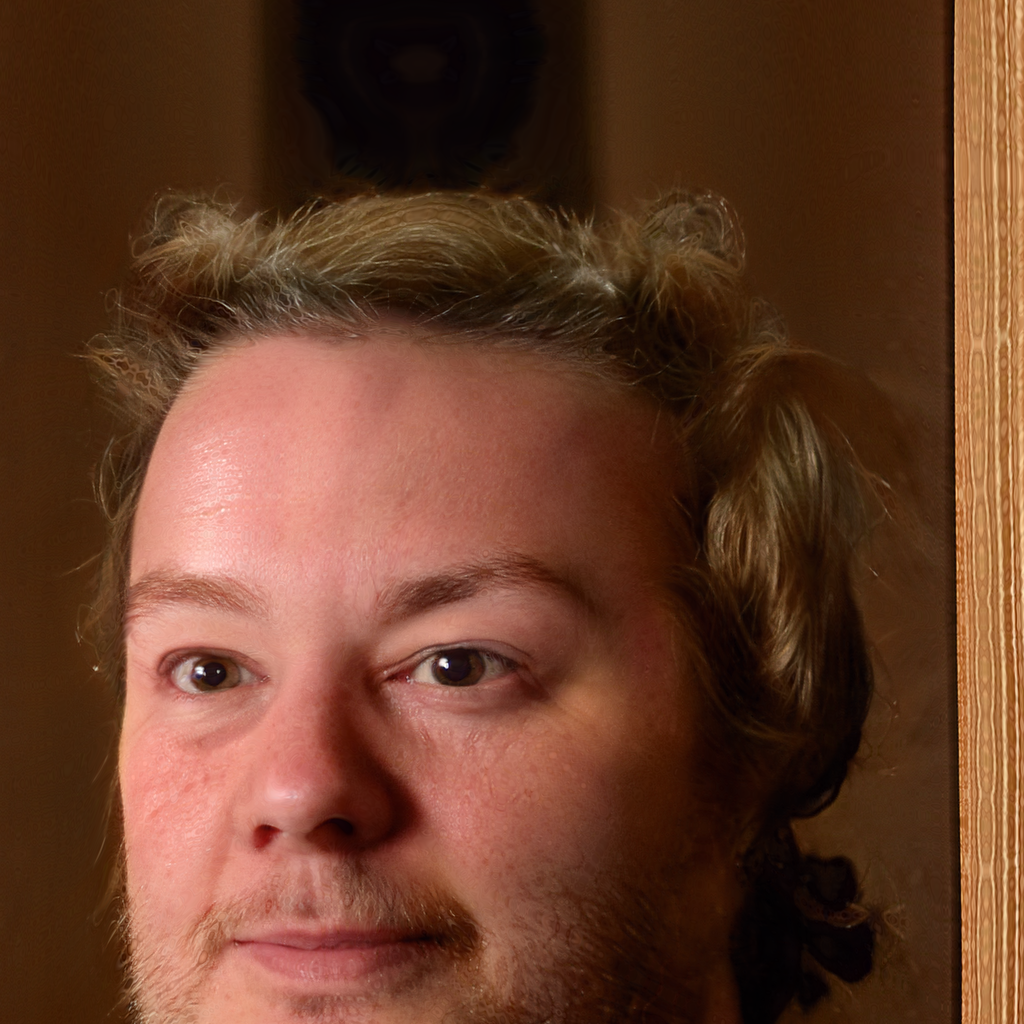

In [20]:
from IPython.display import Image
Image(filename='test1.png')


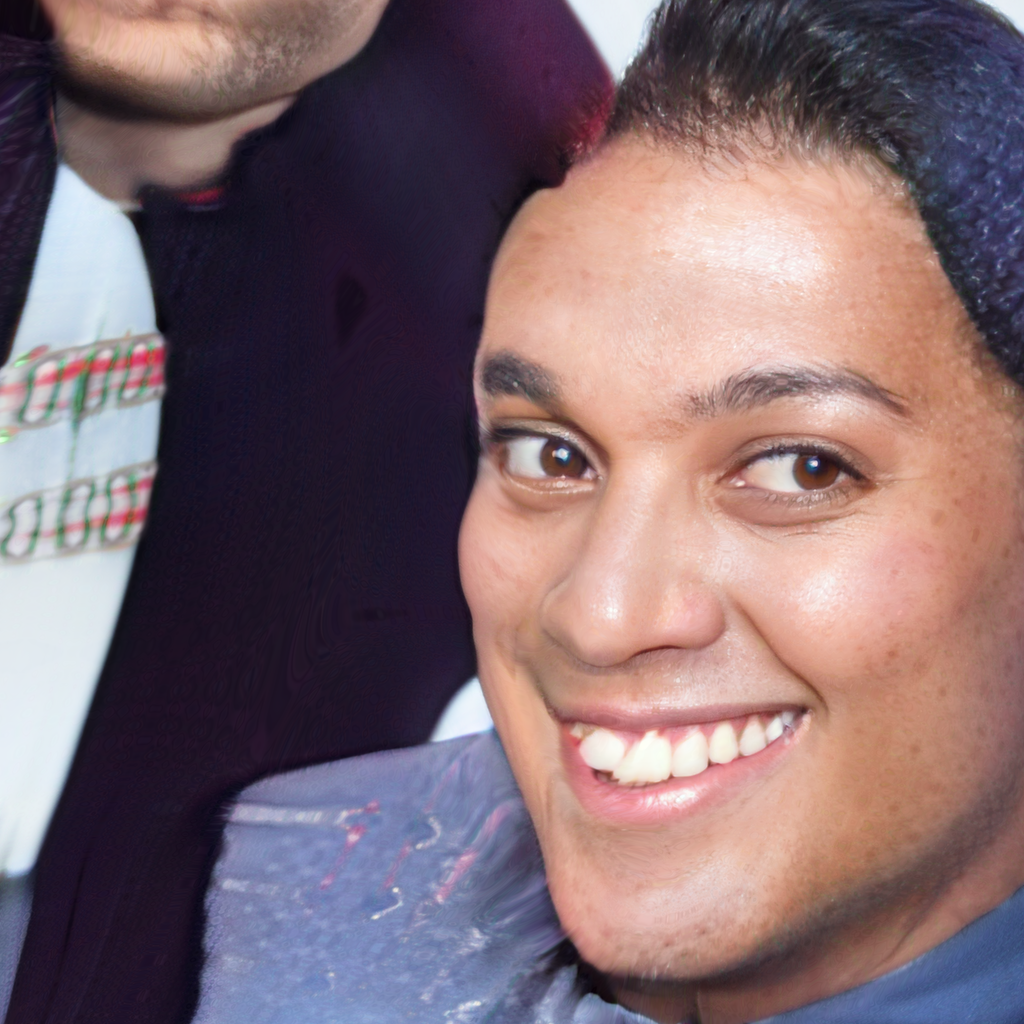

In [19]:
Image(filename='test2.png') 